## make_count_df_122_structures
The purpose of this notebook is to create a dataframe of total counts within the 122 specific structures provided by Jess/Will.

We don't need to worry about fractional counts here at all.

In [15]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import edt
import seaborn as sns
import graphviz

%matplotlib inline

## Data loading and validation

In [16]:
main_file = '../data/animals_eroded_counts_20201125.csv'
pma_segment_props_file = '../data/pma_segment_properties_info'
pma_ontology_json_file = '../data/PMA_ontology.json'
structures_file = '../data/structures_6.22.20.csv' 
pivot_table_file = '../data/pivot_20201125.csv'

In [17]:
# Read in the new dataframe containing cell counts in each PMA brain region
main_df = pd.read_csv(main_file)
main_df

,brain,brain_longname,condition,batch,root,Midbrain,Oculomotor nucleus,Medial terminal nucleus of the accessory optic tract,Lateral terminal nucleus of the accessory optic tract,Dorsal terminal nucleus of the accessory optic tract,...,supraoptic commissures,fasciculus retroflexus,habenular commissure,stria medullaris,nigrostriatal tract,rubrospinal tract,ventral tegmental decussation,crossed tectospinal pathway,direct tectospinal pathway,doral tegmental decussation
0,an011,an011,acquisition_day1,202010_cfos,0,13350,0,34,29,24,...,22,57,0,90,95,508,41,27,0,3
1,an012,an012,acquisition_day1,202010_cfos,0,11361,22,40,14,93,...,120,64,0,79,183,387,36,40,0,4
2,an013,an013,acquisition_day1,202010_cfos,1,12563,11,68,39,5,...,26,26,1,68,71,352,26,29,0,1
3,an014,an014,acquisition_day1,202010_cfos,2,12554,3,28,62,98,...,53,70,0,83,109,197,18,51,0,0
4,an015,an015,acquisition_day1,202010_cfos,2,11431,2,20,8,4,...,38,20,1,73,53,421,23,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,an30_crus1_lat,an30_crus1_lat,Vehicle_control_reversal,202002_cfos,3,32942,2,216,98,427,...,88,28,3,47,122,864,92,67,0,0
165,an31_crus1_lat,an31_crus1_lat,Vehicle_control_reversal,202002_cfos,1,33377,9,108,162,324,...,85,14,0,97,110,1249,188,96,0,9
166,an32_crus1_lat,an32_crus1_lat,Vehicle_control_reversal,202002_cfos,7,36458,2,208,167,199,...,114,25,4,249,224,1657,94,157,0,4
167,an33_crus1_lat,an33_crus1_lat,Vehicle_control_reversal,202002_cfos,4,29123,4,59,128,481,...,94,39,3,29,90,978,56,107,0,2


In [18]:
batches = main_df['batch'].unique()
conditions = main_df['condition'].unique()

In [19]:
# Read in the pivot table df
pivot_df = pd.read_csv(pivot_table_file)
pivot_df

,condition,201810_adultacutePC_ymaze_cfos,201904_ymaze_cfos,201908_tpham_ymaze_cfos,202002_cfos,202010_cfos
0,CNO_control_no_reversal,0,8,0,0,0
1,CNO_control_reversal,0,10,7,5,0
2,CNOnCrusILT,0,0,8,10,0
3,CNOnCrusIRT,0,0,9,10,0
4,Vehicle_control_reversal,0,0,0,9,0
5,acquisition_day1,0,0,0,0,10
6,acquisition_day2,0,0,0,0,10
7,cno_injection,0,0,0,3,0
8,crusI_bilateral_reversal,6,0,0,0,0
9,dilutedvector_control_reversal,0,0,0,14,0


In [20]:
structures_df = pd.read_csv(structures_file)
structures_df

,name
0,Anterior amygdalar area
1,Basolateral amygdalar nucleus
2,Central amygdalar nucleus
3,Cortical amygdalar area
4,Intercalated amygdalar nucleus
...,...
117,Nucleus incertus
118,Pontine reticular nucleus
119,Nucleus raphe pontis
120,Subceruleus nucleus


In [21]:
structure_names = structures_df['name'] .values
structure_names

array(['Anterior amygdalar area', 'Basolateral amygdalar nucleus',
       'Central amygdalar nucleus', 'Cortical amygdalar area',
       'Intercalated amygdalar nucleus', 'Lateral amygdalar nucleus',
       'Posterior amygdalar nucleus', 'Somatomotor areas',
       'Somatosensory areas', 'Gustatory areas', 'Visceral area',
       'Auditory areas', 'Visual areas', 'Anterior cingulate area',
       'Prelimbic area', 'Infralimbic area', 'Orbital area',
       'Retrosplenial area', 'Posterior parietal association areas',
       'Temporal association areas', 'Perirhinal area', 'Ectorhinal area',
       'Hippocampal region', 'Retrohippocampal region',
       'Endopiriform nucleus', 'Caudoputamen', 'Nucleus accumbens',
       'Fundus of striatum', 'Lateral septal nucleus',
       'Septofimbrial nucleus', 'Septohippocampal nucleus', 'Pallidum',
       'Ventral anterior-lateral complex of the thalamus',
       'Ventral medial nucleus of the thalamus',
       'Ventral posterolateral nucleus of t

In [22]:
with open(pma_ontology_json_file,'r') as infile:
    pma_ontology_dict = json.load(infile)

In [23]:
class Node():
    """ For making the ontology graph"""
    def __init__(self,name):
        self.name = name
        self.parent = None
        self.children = [] # list of Node objects
        self.level = None
    def __repr__(self):
        return str(self.name)

In [24]:
class Graph():
    """ The ontology graph """
    def __init__(self):
        self.nodes = {} # map name to Node object
        self.html_str = ''
        self.level = 0
        self.last_checked_nodename = None
    def make_graph(self,dic):
        name = dic.get('name')
        if name not in self.nodes:
            node = Node(name)
            self.nodes[name] = node
        else:
            node = self.nodes[name]
        if name == 'root':
            node.level = 0
        children = dic.get('children')
        self.level += 1
        for child in children: # child is a dict
            child_name = child.get('name')
            child_node = Node(child_name)
            child_node.parent = node
            child_node.level = self.level 
            self.nodes[child_name] = child_node
            node.children.append(child_node)
            self.make_graph(child)
        self.level -= 1
    def print_branch(self,nodename,level=0,stoplevel=2):
        """ 
        ---PURPOSE---
        Print out the branch of this ontology, 
        starting with a parent node name
        ---INPUT---
        nodename     The parent node you want to start at
        level        An internal variable. Do not modify.
        stoplevel    The number of levels down from the parent 
                     node that you want to print. 
                     Use -1 to print the entire branch out
        """
        if stoplevel == -1:
            pass
        elif level > stoplevel:
            return
        
        print("\t"*level,level,nodename)
        for child in self.nodes[nodename].children:
            self.print_branch(child.name,level+1,stoplevel=stoplevel)
        level-=1
    
    def visualize_graph(self,nodename,stoplevel):
        """ 
        ---PURPOSE---
        Visualize a graph starting at a given node
        and stopping at a certain number of levels down 
        the ontology.
        ---INPUT---
        nodename     The parent node you want to start at
        stoplevel    The number of levels down from the parent 
                     node that you want to print
        """
        graph = graphviz.Digraph()
        self.fill_viz_graph(nodename=nodename,graph=graph,level=0,stoplevel=stoplevel)
        return graph
    
    def fill_viz_graph(self,nodename,graph,level,stoplevel):
        if stoplevel == -1:
            pass
        elif level >= stoplevel:
            return
        graph.node(nodename)
        for child in self.nodes[nodename].children:
            graph.edge(nodename,child.name)
            self.fill_viz_graph(child.name,graph=graph,level=level+1,stoplevel=stoplevel)
        level-=1
        return
    def make_html_ontology(self):
        """ 
        ---PURPOSE---
        Print out the entire ontology
        in html format with regions
        that are included in the dataframe in bold
        ---INPUT---
        """
        # reset html_str
        self.html_str = ''
        self.html_helper(nodename='root')
        return self.html_str

    def html_helper(self,nodename):
        node = self.nodes[nodename]
        level = node.level
        
        if nodename == 'root':
            previous_level = -1
        else:
            previous_node = self.nodes[self.last_checked_nodename]
            previous_level = previous_node.level
        
        if level > previous_level:
            self.html_str += '<ul style="list-style-type: none;">'
        elif level == previous_level:
            # dont need to do anything
            pass
        elif level < previous_level:
            # then we need to end unordered lists
            # the number of which we need to end depends on the difference between
            # current and previous level
            level_diff = previous_level-level
            self.html_str += '</ul>'*level_diff
        # Add the actual text to the html string
        # use boldface if nodename is in the volume and therefore a dataframe column
        if nodename in main_df.columns:
            self.html_str += '<li>' + ' '.join([str(level),f'<b>{nodename}</b>','</li>'])
        else:
            self.html_str += '<li>' + ' '.join([str(level),nodename,'</li>'])
        self.last_checked_nodename = nodename
        for child in self.nodes[nodename].children:
            self.html_helper(child.name,)
        return

In [11]:
# Make a graph containing all brain regions as nodes and parent-child relationships as edges
graph = Graph()
graph.make_graph(pma_ontology_dict)

As always we need our get_progeny() function to get the list of progeny given a region

In [8]:
def get_progeny(dic,parent_structure,progeny_list):
    """ 
    ---PURPOSE---
    Get a list of all progeny of a structure name.
    This is a recursive function which is why progeny_list is an
    argument and is not returned.
    ---INPUT---
    dic                  A dictionary representing the JSON file 
                         which contains the ontology of interest
    parent_structure     The structure
    progeny_list         The list to which this function will 
                         append the progeny structures. 
    """
    name = dic.get('name')
    children = dic.get('children')
    if name == parent_structure:
        for child in children: # child is a dict
            child_name = child.get('name')
            progeny_list.append(child_name)
            get_progeny(child,parent_structure=child_name,progeny_list=progeny_list)
        return
    
    for child in children:
        child_name = child.get('name')
        get_progeny(child,parent_structure=parent_structure,progeny_list=progeny_list)
    return

We also need a function to get total counts from a given region for a given brain. 

In [9]:
def get_total_counts(soi,series,debug=False):
    """ Get the total counts in a region
    and all of its descendent regions 
    from a single dataframe series (single brain)
    
    ---INPUT---
    soi    region name of interest
    seires pandas series representing a row (single brain) from the main dataframe
    ---OUTPUT---
    total  the total number of summed
    """
    
    progeny_list=[]
    get_progeny(pma_ontology_dict,parent_structure=soi,progeny_list=progeny_list)
    total=0 #store counts in this list
    # Add the counts for the region itself, if that region is in the dataframe
    try:
        total+=series[soi]
        if debug:
            print(f"{soi} is in dataframe!")
    except:
        if debug:
            print(f"{soi} not in dataframe")
        pass
    for progen in progeny_list:
        try:
            
            count = int(series[progen])
            if debug:
                print(f"{progen} is in dataframe!")
            total+=count    
        except:
            if debug:
                print(f"{progen} not in dataframe")
            pass
    return total

# Helper scripts for plots

In [15]:
# helper functions for plots below
def get_counts_dict(brain_division_dict,batch,condition,count_type):
    """ 
    ---PURPOSE---
    Given a batch and condition, calculate either the total or fractional
    counts in each region for each animal in this batch/condition combo
    in the main dataframe  
    ---INPUT---
    batch          The "experiment" column of the main dataframe
    condition      The "Condition" column of the main dataframe
    count_type     if 'frac' plots using fractional counts. 
                   if 'total' plots using total counts
    ---OUTPUT---
    counts_dict    dictionary[brain][division] = count
    """
    assert count_type in ['frac','total']
    assert batch in main_df['batch'].unique()
    assert condition in main_df['condition'].unique()
    batch_mask = main_df['batch'] == batch
    condition_mask = main_df['condition'] == condition
    comb_mask = np.logical_and(batch_mask,condition_mask)
    batch_condition_df = main_df[comb_mask]
    n_animals = len(batch_condition_df)
    # make a dictionary where keys are Brain names and values are dictionaries mapping brain division
    # to either fractional or total counts
    counts_dict = {}
    for index,brain_series in batch_condition_df.iterrows():
        brain = brain_series['brain']
        # Figure out sum of all regions in the brain division dict to provide normalization
        normalizing_counts = 0
        for division in brain_division_dict:
            brain_regions = brain_division_dict[division]
            total_counts = sum([get_total_counts(region,brain_series) for region in brain_regions])
            normalizing_counts += total_counts

        counts_dict[brain] = {}
        for division in brain_division_dict:
            subregions = brain_division_dict[division]
            if count_type == 'frac':
                counts = [get_fractional_counts(soi,brain_series,normalizing_counts) for soi in subregions]
            elif count_type == 'total':
                counts = [get_total_counts(soi,brain_series) for soi in subregions]
            counts_dict[brain][division] = sum(counts)
    return counts_dict


def create_division_df(brain_division_dict,batch,condition,count_type='frac'):
    """ 
    ---PURPOSE---
    Given a batch and condition create a pandas DataFrame
    containing columns: Brain, Batch, Condition and The major divisions.
    ---INPUT---
    batch          The "experiment" column of the main dataframe
    condition      The "Condition" column of the main dataframe
    count_type     if 'frac' plots using fractional counts. 
                   if 'total' plots using total counts
    """
    counts_dict = get_counts_dict(brain_division_dict,batch,condition,count_type)

    counts_by_division = []
    for brain in counts_dict:
        division_dict = {'brain':brain}
        for division in counts_dict[brain]:
            division_dict[division] = counts_dict[brain][division]
        counts_by_division.append(division_dict)
    df = pd.DataFrame(counts_by_division)
    df = df.assign(batch=batch,condition=condition)
    return df

In [24]:
def get_fractional_counts(soi,series,normalizing_counts,debug=False):
    """ Get the fractional counts in a region
    and all of its descendent regions.
    
    ---INPUT---
    soi                 region name of interest
    seires              pandas series representing a row (single brain) from the main dataframe
    normalizing_counts  The total counts to use as the denominator for calculating the fraction 
    ---OUTPUT---
    The fractional count of the single soi out of the entire Telencephalon, Diencephalon, Mesencephalon
    """
    
    progeny_list=[]
    get_progeny(pma_ontology_dict,parent_structure=soi,progeny_list=progeny_list)
    total=0 #store counts in this list
    # Add the counts for the region itself, if that region is in the dataframe
    try:
        total+=series[soi]
        if debug:
            print(f"{soi} is in dataframe!")
    except:
        if debug:
            print(f"{soi} not in dataframe")
        pass
    for progen in progeny_list:
        try:
            count = int(series[progen])
            if debug:
                print(f"{progen} is in dataframe!")
            total+=count    
        except:
            if debug:
                print(f"{progen} not in dataframe")
            pass
    return total/normalizing_counts

In [25]:
def make_all_division_df(brain_division_dict,count_type='total'):
    """ 
    ---PURPOSE---
    Given a brain_division_dict create a pandas DataFrame
    containing columns: Brain, Batch, Condition and the subdivisions
    for all batches and conditions.
    ---INPUT---
    batch          The "experiment" column of the main dataframe
    condition      The "Condition" column of the main dataframe
    count_type     if 'frac' plots using fractional counts. 
                   if 'total' plots using total counts
    """
    df_list = []
    for ii,batch in enumerate(batches):
        # figure out which conditions were used in this batch
        condition_list = pivot_df['condition'][pivot_df[batch]>0]
        for condition in condition_list:
            counts_dict = get_counts_dict(brain_division_dict,batch,condition,count_type)

            counts_by_division = []
            for brain in counts_dict:
                division_dict = {'brain':brain}
                for division in counts_dict[brain]:
                    division_dict[division] = counts_dict[brain][division]
                counts_by_division.append(division_dict)
            df = pd.DataFrame(counts_by_division)
            df = df.assign(batch=batch,condition=condition)
            df_list.append(df)
    cdf = pd.concat(df_list)
    # reorder columns to be brain,batch,condition,fractions...
    cols = cdf.columns.tolist()
    newcols = cols[0:1] + cols[-2:] + cols[1:-2]
    cdf = cdf[newcols]
    return cdf

In [49]:
# Make a brain division dict from the list of regions
bdict = {name:[name] for name in structure_names}

In [50]:
bdict

{'Anterior amygdalar area': ['Anterior amygdalar area'],
 'Basolateral amygdalar nucleus': ['Basolateral amygdalar nucleus'],
 'Central amygdalar nucleus': ['Central amygdalar nucleus'],
 'Cortical amygdalar area': ['Cortical amygdalar area'],
 'Intercalated amygdalar nucleus': ['Intercalated amygdalar nucleus'],
 'Lateral amygdalar nucleus': ['Lateral amygdalar nucleus'],
 'Posterior amygdalar nucleus': ['Posterior amygdalar nucleus'],
 'Somatomotor areas': ['Somatomotor areas'],
 'Somatosensory areas': ['Somatosensory areas'],
 'Gustatory areas': ['Gustatory areas'],
 'Visceral area': ['Visceral area'],
 'Auditory areas': ['Auditory areas'],
 'Visual areas': ['Visual areas'],
 'Anterior cingulate area': ['Anterior cingulate area'],
 'Prelimbic area': ['Prelimbic area'],
 'Infralimbic area': ['Infralimbic area'],
 'Orbital area': ['Orbital area'],
 'Retrosplenial area': ['Retrosplenial area'],
 'Posterior parietal association areas': ['Posterior parietal association areas'],
 'Tempora

In [54]:
df = make_all_division_df(bdict,count_type='total')

In [55]:
df

,brain,batch,condition,Anterior amygdalar area,Basolateral amygdalar nucleus,Central amygdalar nucleus,Cortical amygdalar area,Intercalated amygdalar nucleus,Lateral amygdalar nucleus,Posterior amygdalar nucleus,...,Supragenual nucleus,Supratrigeminal nucleus,Tegmental reticular nucleus,Motor nucleus of trigeminal,Laterodorsal tegmental nucleus,Nucleus incertus,Pontine reticular nucleus,Nucleus raphe pontis,Subceruleus nucleus,Sublaterodorsal nucleus
0,an011,202010_cfos,acquisition_day1,156,2173,2163,736,160,601,293,...,0,263,223,137,221,95,619,31,54,40
1,an012,202010_cfos,acquisition_day1,350,2327,1595,781,224,816,292,...,0,98,165,225,166,36,870,45,14,31
2,an013,202010_cfos,acquisition_day1,569,2517,1224,824,153,704,521,...,0,235,365,183,221,85,834,111,93,64
3,an014,202010_cfos,acquisition_day1,688,2051,1224,523,169,1076,514,...,0,149,224,143,157,106,864,120,17,50
4,an015,202010_cfos,acquisition_day1,150,1452,608,330,100,417,304,...,0,144,272,119,149,51,660,56,25,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,dadult_pc_crus1_1,201810_adultacutePC_ymaze_cfos,vector_control_reversal,131,311,264,300,18,167,109,...,0,0,0,0,15,0,142,0,0,0
1,dadult_pc_crus1_3,201810_adultacutePC_ymaze_cfos,vector_control_reversal,123,512,298,494,19,113,243,...,0,0,0,0,0,0,110,0,0,0
2,dadult_pc_crus1_4,201810_adultacutePC_ymaze_cfos,vector_control_reversal,99,279,142,143,4,91,40,...,0,0,0,0,0,0,3,0,0,0
3,dadult_pc_lob6_14,201810_adultacutePC_ymaze_cfos,vector_control_reversal,69,711,281,363,28,175,104,...,0,0,0,0,0,0,0,0,0,0


In [56]:
get_counts_dict(bdict,batches[0],conditions[0],'total')

{'an011': {'Anterior amygdalar area': 156,
  'Basolateral amygdalar nucleus': 2173,
  'Central amygdalar nucleus': 2163,
  'Cortical amygdalar area': 736,
  'Intercalated amygdalar nucleus': 160,
  'Lateral amygdalar nucleus': 601,
  'Posterior amygdalar nucleus': 293,
  'Somatomotor areas': 4545,
  'Somatosensory areas': 13982,
  'Gustatory areas': 361,
  'Visceral area': 631,
  'Auditory areas': 1055,
  'Visual areas': 1886,
  'Anterior cingulate area': 1165,
  'Prelimbic area': 352,
  'Infralimbic area': 354,
  'Orbital area': 966,
  'Retrosplenial area': 1743,
  'Posterior parietal association areas': 417,
  'Temporal association areas': 901,
  'Perirhinal area': 286,
  'Ectorhinal area': 935,
  'Hippocampal region': 14560,
  'Retrohippocampal region': 8314,
  'Endopiriform nucleus': 964,
  'Caudoputamen': 26477,
  'Nucleus accumbens': 1024,
  'Fundus of striatum': 191,
  'Lateral septal nucleus': 1647,
  'Septofimbrial nucleus': 35,
  'Septohippocampal nucleus': 22,
  'Pallidum': 

In [57]:
ls ../data

202002_cfos_subset_PCA_groups.csv
animals_counts.csv
animals_eroded_counts_20201125.csv
animals_eroded_counts_20201125_withoutliers.csv
brain_regions_fine_grained.csv
developmentalregions.xlsx
pivot_20201125.csv
pivot.csv
pma_centroids.csv
pma_centroids_xyz.csv
PMA_graph_horizontal_colored.pdf
PMA_ontology_graph.pdf
PMA_ontology.json
PMA_regions.html
PMA_regions.txt
pma_segment_properties_info
structures_6.22.20.csv


In [59]:
df.to_csv('../data/jess_cfos_total_counts_122_structures_20201125.csv')

In [12]:
# Make a digraph showing the ontology with all of the regions used in yellow
def make_colored_graph(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    name = dic.get('name')
  
    if name in structure_names:
        graph.node(name,style='filled',fillcolor='yellow')
    children = dic.get('children')
    for child in children:
        child_name = child.get('name')            
        graph.edge(name,child_name)
        make_colored_graph(child,graph)
    return

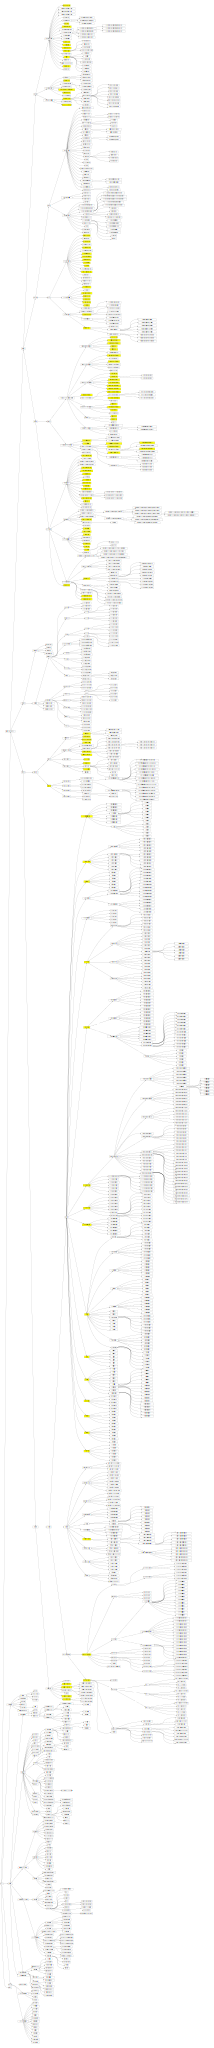

In [13]:
G = graphviz.Digraph()
G.attr('node',shape='box')
make_colored_graph(pma_ontology_dict,G)
G.attr(rankdir='LR')
G

In [14]:
G.save('../data/PM_graph_122structures_colored.dot')

'../data/PM_graph_122structures_colored.dot'